# Manual checking: Comparison between GPT and manual categories
Data is pulled from this document: [google sheets](https://docs.google.com/spreadsheets/d/1z8Lm5_pE_g_zPnXJCuHm_Tm1s-f3LrYAsWVHIWqetA4/edit#gid=1359730845)\
Author: Josie R\
Last modified: 5/6/24

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = {'Dis/Agreement Level': ['Correct', 'Incorrect', 'Maybe'],
        'Female': [78, 3, 6],
        'Male': [131, 26, 25]}
 
# Create DataFrame of agreement levels with human-raters and GPT rating
df = pd.DataFrame(data)
df

Dis/Agreement Level  Female  Male
0             Correct      78   131
1           Incorrect       3    26
2               Maybe       6    25

In [3]:
f = 78/87
m = 131/187
print("percent of correct outputs for female politicians: ", f)
print("percent of correct outputs for male politicians: ", m)
print("percent of correct outputs for all politicians: ", (78+131)/(78+3+6+131+26+25))
print("percent by chance: ", m*f)

percent of correct outputs for female politicians:  0.896551724137931
percent of correct outputs for male politicians:  0.7005347593582888
percent of correct outputs for all politicians:  0.7769516728624535
percent by chance:  0.6280656463212244


### Visualizations

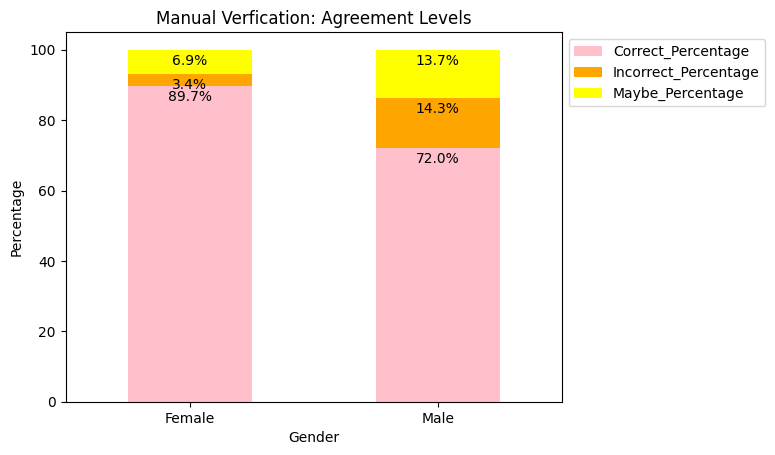

In [5]:
# final stacked bar plot
data2 = {'Gender': ['Female', 'Male'],
        'Correct': [78, 131],
        'Incorrect': [3, 26],
        'Maybe': [6, 25]}

df = pd.DataFrame(data2)
df['Total'] = df['Correct'] + df['Incorrect'] + df['Maybe']
df['Correct_Percentage'] = (df['Correct'] / df['Total']) * 100
df['Incorrect_Percentage'] = (df['Incorrect'] / df['Total']) * 100
df['Maybe_Percentage'] = (df['Maybe'] / df['Total']) * 100
colors = ['pink', 'orange', 'yellow']
ax = df.plot.bar(x='Gender', y=['Correct_Percentage', 'Incorrect_Percentage', 'Maybe_Percentage'], 
                 rot=0, color=colors, stacked=True)
ax.set_xlabel("Gender")
ax.set_ylabel("Percentage")

#labels
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.1f}%'.format(height), (x + width/2, y + height - 5), ha='center', va='bottom')

plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.title(f"Manual Verfication: Agreement Levels")
plt.show()

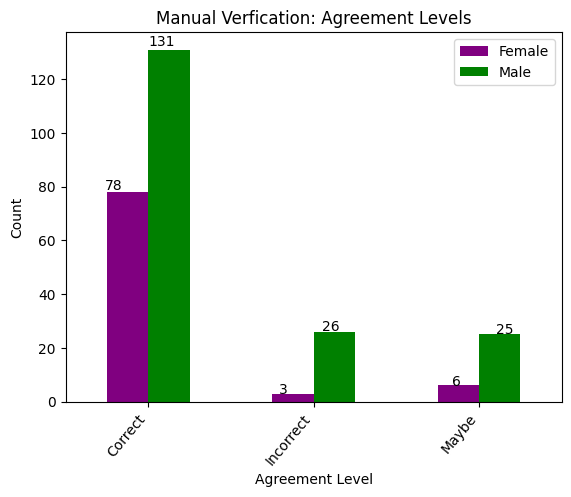

In [92]:
# side by side barplot
colors = ['purple', 'green']
ax = df.plot.bar(x='Dis/Agreement Level', rot=0, color=colors)
ax.set_xlabel("Agreement Level")
ax.set_ylabel("Count")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.05, p.get_height() * 1.010))
#plt.legend(loc='upper left')
plt.title(f"Manual Verfication: Agreement Levels")
plt.xticks(rotation=50, ha='right')
plt.show()

In [49]:
# stacked bar plot
df['Total'] = df['Female'] + df['Male']
df['Female_Percentage'] = (df['Female'] / df['Total']) * 100
df['Male_Percentage'] = (df['Male'] / df['Total']) * 100
colors = ['purple', 'green']
ax = df.plot.bar(x='Dis/Agreement Level', y=['Female_Percentage', 'Male_Percentage'], 
                 rot=0, color=colors, stacked=True)
ax.set_xlabel("Dis/Agreement Level")
ax.set_ylabel("Percentage")
#labels
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate('{:.1f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom')
plt.show()